#  Unsupervised Learning
### Mall Customer Segmentation 

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering


In [3]:
# Load the dataset (assuming it's downloaded as 'Mall_Customers.csv')
mall_customers = pd.read_csv("Mall_Customers.csv")

# Display the first 5 rows of the dataset
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Show information about the dataset
print(mall_customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [5]:
# Display the shape/size of the dataset
mall_customers.shape

(200, 5)

In [6]:
# Check for missing values
print(mall_customers.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# Display some descriptive statistics
print(mall_customers.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [8]:
# Drop unnecessary columns
mall = mall_customers.drop(["CustomerID", "Gender"], axis=1)

# Standardize the data
scaler = StandardScaler()
mall_customers_scaled = scaler.fit_transform(mall)

#### K-means

In [9]:
# Using K-means clustering to segment the customers into different groups
kmeans = KMeans(n_clusters=5, init='k-means++', n_init = 10, random_state=0)  # Change the number of clusters as needed
kmeans.fit(mall_customers_scaled)
mall_customers['cluster_kmeans'] = kmeans.labels_
mall_customers.head()

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_kmeans
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4


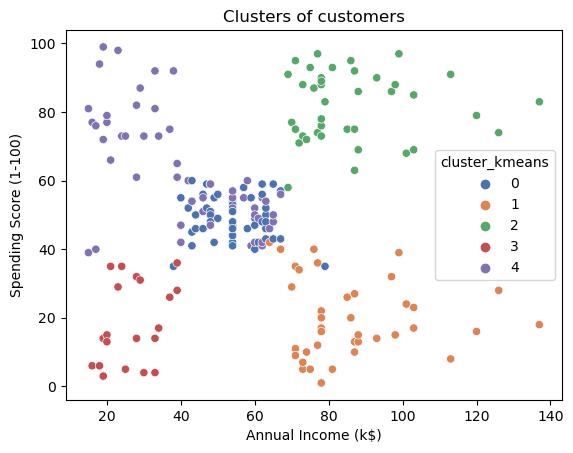

In [21]:
# Visualize the clusters
palette = sns.color_palette("deep", n_colors=5)
sns.scatterplot(data=mall_customers, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_kmeans', palette=palette)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [11]:
# Provide insights on each customer segment based on the clustering
for cluster in mall_customers['cluster_kmeans'].unique():
    print(f"Cluster {cluster}:")
    print(mall_customers[mall_customers['cluster_kmeans'] == cluster].describe())

Cluster 4:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   54.000000  54.000000           54.000000               54.000000   
mean    55.648148  25.185185           41.092593               62.240741   
std     36.656054   5.508395           16.815613               16.596130   
min      1.000000  18.000000           15.000000               39.000000   
25%     24.500000  21.000000           25.750000               50.000000   
50%     49.500000  24.000000           40.000000               58.000000   
75%     88.750000  30.000000           57.750000               74.500000   
max    121.000000  38.000000           67.000000               99.000000   

       cluster_kmeans  
count            54.0  
mean              4.0  
std               0.0  
min               4.0  
25%               4.0  
50%               4.0  
75%               4.0  
max               4.0  
Cluster 3:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
c

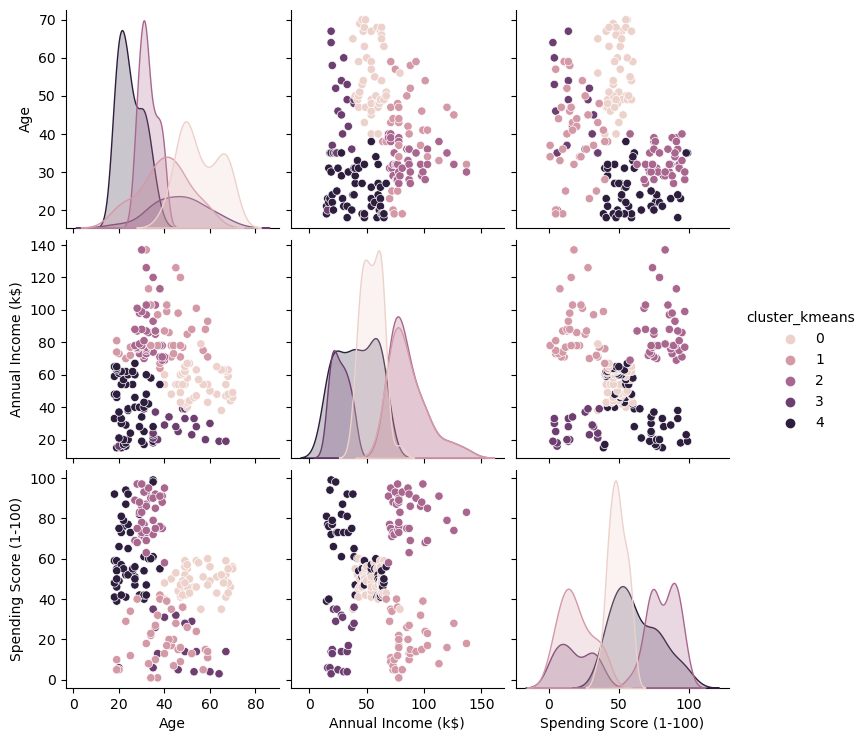

In [12]:
# Drop unnecessary columns
mall_customers_copy = mall_customers.drop(["CustomerID"], axis=1)

# Visualize the clusters against all variables in the dataset
sns.pairplot(mall_customers_copy, hue='cluster_kmeans')
plt.show()

#### Hierarchical Clustering

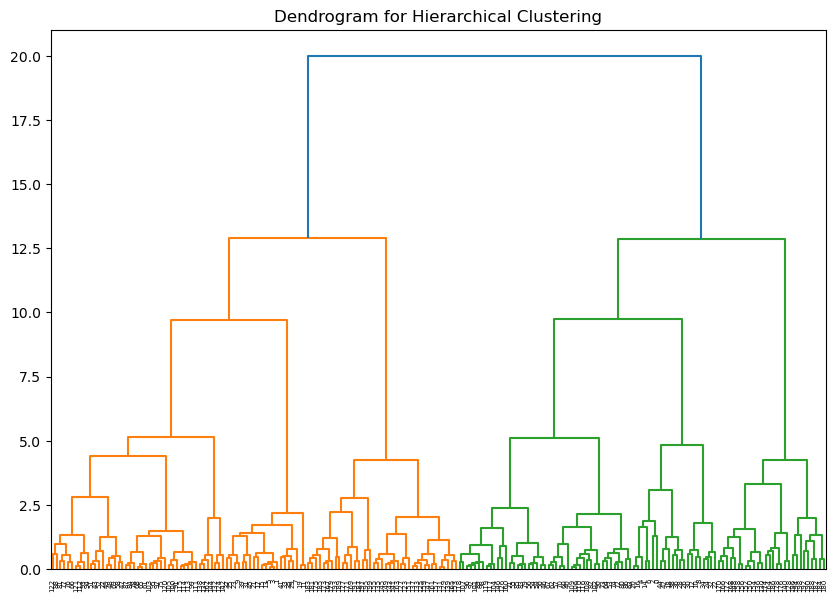

In [13]:
# Using hierarchical clustering to segment the customers into different groups
linked = linkage(mall_customers_scaled, 'ward')

# Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()


In [14]:
# Fit the hierarchical clustering model and assign the labels
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
mall_customers['cluster_hierachical'] = cluster.fit_predict(mall_customers_scaled)

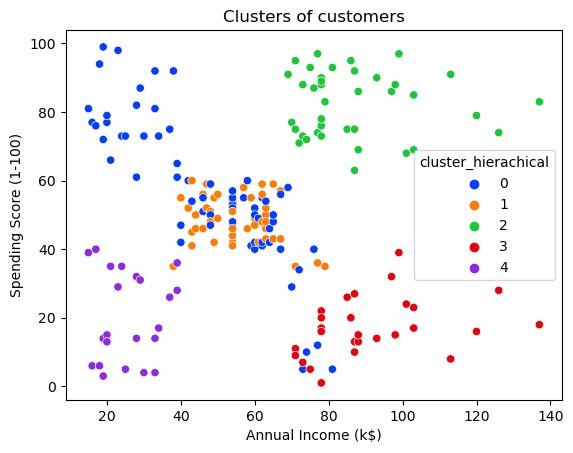

In [15]:
# Visualize the clusters
palette = sns.color_palette("bright", n_colors=5)
sns.scatterplot(data=mall_customers, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_hierachical', palette=palette)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

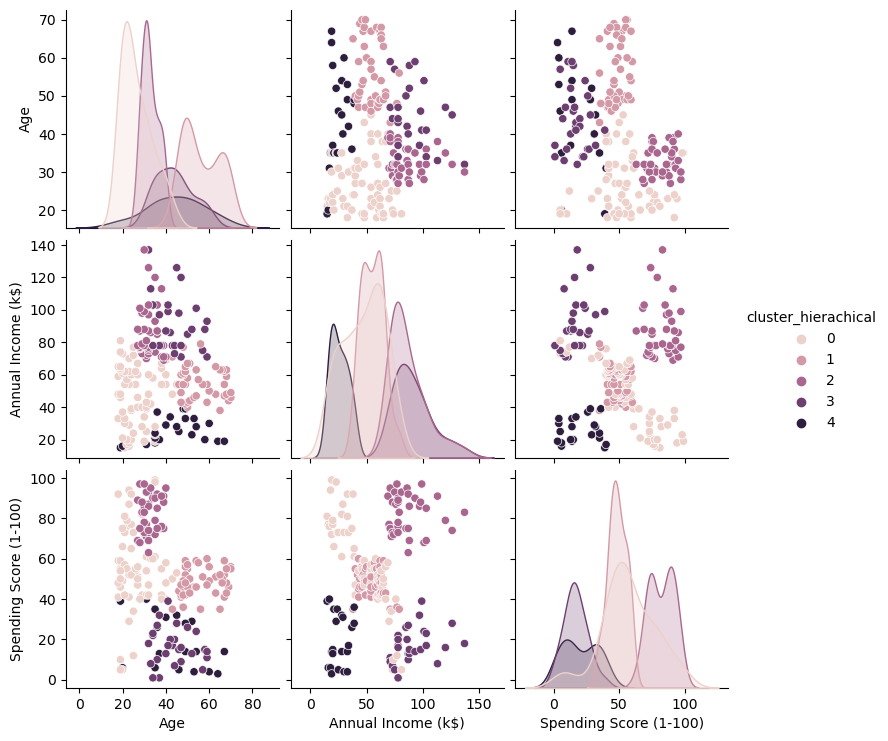

In [16]:
# Drop unnecessary columns
mall_customers_copy2 = mall_customers_copy.drop(["cluster_kmeans"], axis=1)
mall_customers_copy2['cluster_hierachical'] = cluster.fit_predict(mall_customers_scaled)

# Visualize the clusters against other variables in the dataset
sns.pairplot(mall_customers_copy2, hue='cluster_hierachical')
plt.show()

In [17]:
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_kmeans,cluster_hierachical
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,4,0
2,3,Female,20,16,6,3,4
3,4,Female,23,16,77,4,0
4,5,Female,31,17,40,4,4


In [18]:
# Display insights on customer segments for hierarchical clustering
for cluster in mall_customers['cluster_hierachical'].unique():
    print(f"Cluster {cluster}:")
    print(mall_customers[mall_customers['cluster_hierachical'] == cluster].describe())

Cluster 4:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   22.000000  22.000000           22.000000               22.000000   
mean    22.181818  44.318182           25.772727               20.272727   
std     13.290299  12.800247            7.646548               12.947446   
min      1.000000  19.000000           15.000000                3.000000   
25%     11.500000  35.250000           19.250000                7.750000   
50%     22.000000  45.500000           24.500000               16.000000   
75%     32.500000  52.750000           32.250000               31.750000   
max     45.000000  67.000000           39.000000               40.000000   

       cluster_kmeans  cluster_hierachical  
count       22.000000                 22.0  
mean         3.090909                  4.0  
std          0.294245                  0.0  
min          3.000000                  4.0  
25%          3.000000                  4.0  
50%          3.000000             

       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   45.000000  45.000000           45.000000               45.000000   
mean    86.666667  56.400000           55.288889               48.355556   
std     27.164482   8.373117            9.834129                6.869417   
min     41.000000  43.000000           38.000000               35.000000   
25%     64.000000  49.000000           47.000000               43.000000   
50%     84.000000  54.000000           54.000000               48.000000   
75%    107.000000  65.000000           63.000000               55.000000   
max    161.000000  70.000000           79.000000               60.000000   

       cluster_kmeans  cluster_hierachical  
count       45.000000                 45.0  
mean         0.044444                  1.0  
std          0.208409                  0.0  
min          0.000000                  1.0  
25%          0.000000                  1.0  
50%          0.000000                  1.0  


## Model(s) Insight on Customers Segments
(*The clusters color code for the k-means scatterplot visual might differ*)
- Cluster 0 *(Blue)* :- These group of customers earn less but spend more. They could be impulsive buyers or people who are less concerned about savings. They might be attracted by sales and discounts.
- cluster 1 <em>(Orange)</em> :- These group of customer's earning are average and also average in spending. They represent a balanced group and might be considered as the standard customer group.
- cluster 2 *(Green)* :- These group of customers earn high and also spend high. They could be the premium customers who are less sensitive to price but more sensitive to quality and brand.
- cluster 3 *(Red)* :- These group of customers earn high but spend less. They could be more conservative and value-oriented. They might prefer products that are worth their price.
- Cluster 4 *(Blueviolet)* :- These group of customers earn less and spend less. They could be more price-sensitive and might prefer budget-friendly products.